!pip install xgboost

In [36]:
import math
import os
import random
from collections import defaultdict
from itertools import product


import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import zip_longest
from matplotlib.patches import Ellipse

from xgboost import XGBClassifier

In [37]:
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header=None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t', header=None)
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t', header=None)


In [38]:
df_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85],
           dtype='int64')

In [39]:
df_eval.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
            84],
           dtype='int64')

In [40]:
df_tgts.columns

Int64Index([0], dtype='int64')

In [49]:
#X = ['0', '1', '2', '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17',
#            '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
#            '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
#            '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
#            '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84']
#y = ['85']
X = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


y = df_data[85]

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5817    0
5818    0
5819    1
5820    0
5821    0
Name: 85, Length: 5822, dtype: int64

In [43]:
df_data[85].value_counts()

0    5474
1     348
Name: 85, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_data[X], df_data[y], test_size=0.3, random_state=42)

In [9]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [10]:
predictors = df_data[X]
outcome = df_data[y]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(df_data[X], df_data[y])
knn.predict(df_eval)
print (knn.predict_proba(df_eval))

fitted = knn.predict(df_eval)


[[1.   0.  ]
 [0.8  0.2 ]
 [0.9  0.1 ]
 ...
 [1.   0.  ]
 [0.85 0.15]
 [0.9  0.1 ]]


Recall =  0.5
Precision =  0.47025
AUC =  0.6564936181809247


C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


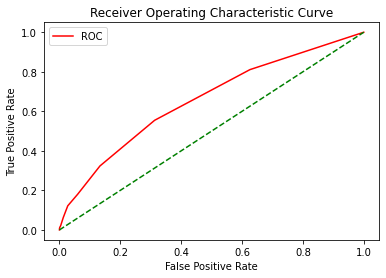

In [11]:
prob= knn.predict_proba(df_eval)
prob = prob[:, 1]
print('Recall = ', recall_score(df_tgts, fitted, average='macro'))

print('Precision = ' ,precision_score(df_tgts, fitted, average='macro'))

fpr, tpr, thresholds = metrics.roc_curve(df_tgts, fitted, pos_label=2)
print('AUC = ', metrics.roc_auc_score(df_tgts, prob))


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



fper, tper, thresholds = roc_curve(df_tgts, prob)
plot_roc_curve(fper, tper)

In [12]:
print(confusion_matrix(df_tgts, fitted).transpose())

[[3762  238]
 [   0    0]]


In [13]:
conf_mat = confusion_matrix(df_tgts, fitted)
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.9405
Recall 1.0
Specificity 0.0


In [14]:
predictors = df_data[X]
outcome = df_data[y]
rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                            oob_score=True)
rf.fit(predictors, outcome)
print(rf.oob_decision_function_)

[[0.98387097 0.01612903]
 [0.97826087 0.02173913]
 [0.97560976 0.02439024]
 ...
 [0.97633136 0.02366864]
 [1.         0.        ]
 [0.92713568 0.07286432]]


In [15]:
predictors = df_data[X]
outcome = df_data[y]


xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
print(xgb.fit(predictors, outcome))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [16]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy',
                                random_state=13, oob_score=True)
    rf.fit(predictors, outcome)
    oobScores.append(rf.oob_score_)

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<AxesSubplot:title={'center':'Nº Estimadores(Árvores) x Taxa de Erro'}, xlabel='n'>

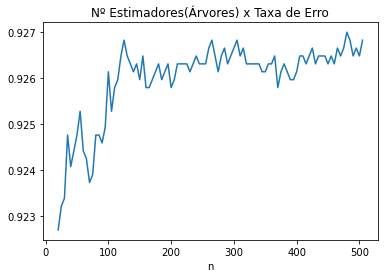

In [17]:
pd.DataFrame({
    'n': n_estimator, 
    'oobScore': oobScores
}).plot(x='n', y='oobScore', legend=False, title='Nº Estimadores(Árvores) x Taxa de Erro')

In [18]:
predictors = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
outcome = 85

X = pd.get_dummies(df_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in df_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=5000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.3, subsample=1,
                            use_label_encoder=False, eval_metric='error')
xgb_default.fit(train_X, train_y)

xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63,
                            use_label_encoder=False, eval_metric='error')
print(xgb_penalty.fit(train_X, train_y))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1000, ...)


In [19]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
print('default (train): ', np.mean(error_default))

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

default (train):  0.0
default:  0.0
penalty:  0.0


In [20]:
results = []
for ntree_limit in range(1, 250):
    train_default = xgb_default.predict_proba(train_X, iteration_range=(1, ntree_limit))[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, iteration_range=(1, ntree_limit))[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, iteration_range=(1, ntree_limit))[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, iteration_range=(1, ntree_limit))[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  penalty train  default test  penalty test
0           1            0.0            0.0           0.0           0.0
1           2            0.0            0.0           0.0           0.0
2           3            0.0            0.0           0.0           0.0
3           4            0.0            0.0           0.0           0.0
4           5            0.0            0.0           0.0           0.0


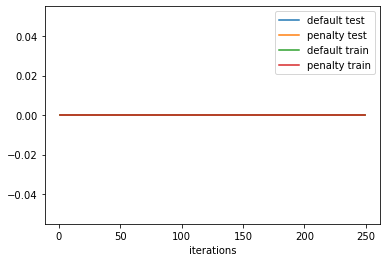

In [21]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

In [22]:
predictors = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
outcome = 85

X = df_data[predictors]
y = pd.Series([1 if o == 'default' else 0 for o in df_data[outcome]])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, use_label_encoder=False)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [24]:
pred = xgb.predict(X_test)

In [25]:
# Confusion matrix
pred_y = pred == 1
true_y = y_test == 1
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)], [np.sum(false_pos), np.sum(true_neg)]],
                       index=['Y = default', 'Y = paid off'],
                       columns=['Yhat = default', 'Yhat = paid off'])
print(conf_mat.transpose())

                 Y = default  Y = paid off
Yhat = default             0             0
Yhat = paid off            0          1747


In [26]:
print(confusion_matrix(y_test, pred).transpose())

[[1747]]


In [27]:
conf_mat = confusion_matrix(y_test, pred)
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))

Precision 1.0
Recall 1.0


In [28]:
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict(X_test), 
                                 pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [29]:
auc = roc_auc_score(df_tgts, xgb.predict(df_eval))
print(auc)

0.5


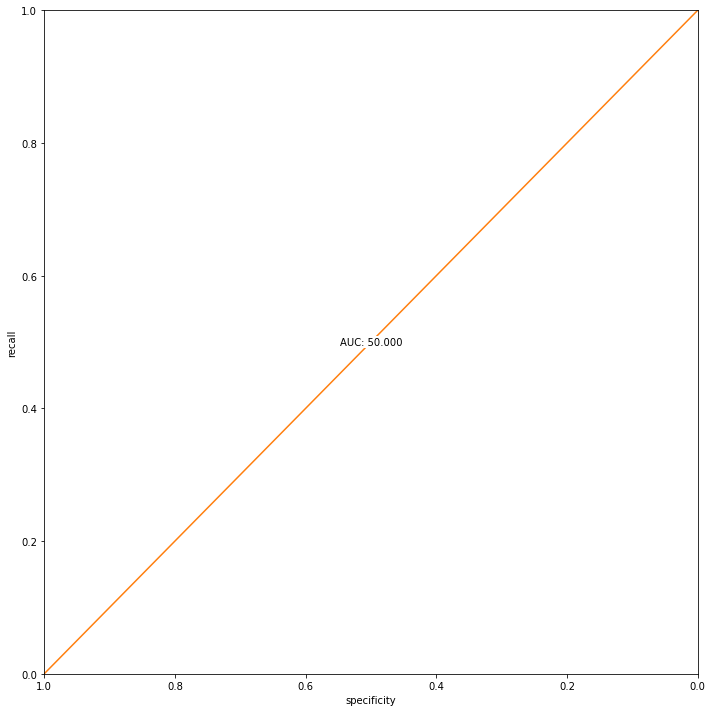

In [30]:
ax = roc_df.plot(x='specificity', y='recall', figsize=(10, 10), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)
ax.text(.5,.5,'AUC: %.3f' % (auc*100),
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
          ha='center', va='center')


plt.tight_layout()
plt.show()

In [31]:

predictors = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
outcome = 85

X = pd.get_dummies(df_data[predictors], drop_first=True)
y = df_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

rf_all_entropy = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
print(rf_all_entropy.fit(X, y))


RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)


In [32]:
rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of different random splits of the data
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.0002, 81), (0.0002, 74), (0.0002, 60), (0.0002, 54), (0.0002, 53), (0.0002, 1), (0.0, 83), (0.0, 82), (0.0, 80), (0.0, 78), (0.0, 77), (0.0, 76), (0.0, 73), (0.0, 72), (0.0, 71), (0.0, 70), (0.0, 69), (0.0, 68), (0.0, 66), (0.0, 65), (0.0, 62), (0.0, 61), (0.0, 59), (0.0, 57), (0.0, 56), (0.0, 55), (0.0, 52), (0.0, 51), (0.0, 50), (0.0, 49), (0.0, 47), (0.0, 45), (0.0, 44), (-0.0002, 84), (-0.0004, 75), (-0.0004, 63), (-0.0004, 48), (-0.0004, 20), (-0.0004, 19), (-0.0006, 40), (-0.0008, 43), (-0.001, 2), (-0.0012, 64), (-0.0012, 24), (-0.0014, 5), (-0.0014, 3), (-0.0016, 26), (-0.0016, 15), (-0.0016, 10), (-0.0018, 7), (-0.0019, 39), (-0.0019, 12), (-0.0019, 11), (-0.0021, 33), (-0.0021, 31), (-0.0021, 28), (-0.0021, 25), (-0.0021, 18), (-0.0021, 14), (-0.0023, 37), (-0.0025, 79), (-0.0025, 34), (-0.0025, 32), (-0.0025, 9), (-0.0029, 16), (-0.0029, 13), (-0.0031, 42), (-0.0031, 41), (-0.0031, 36), (-0.0031, 35), (-0.0031, 23), (-0.0033, 38), (-0.0033

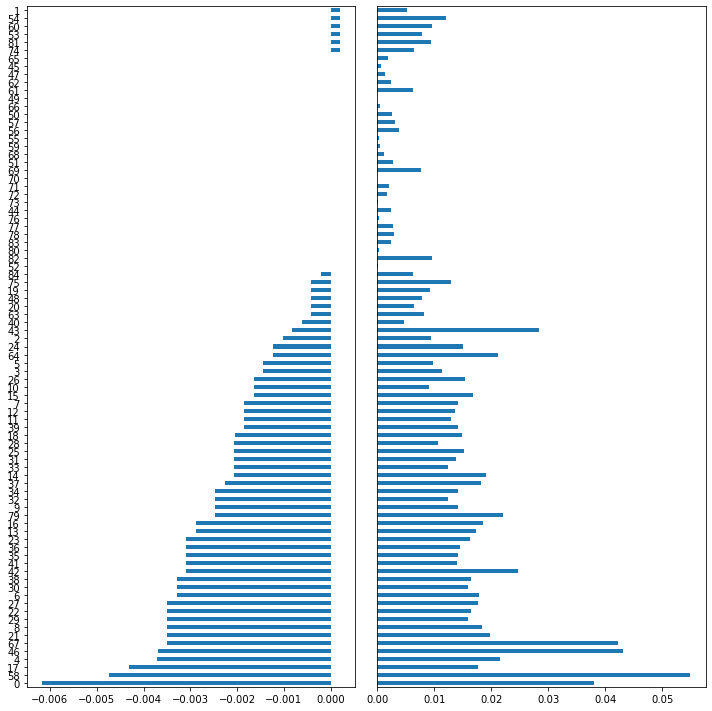

In [33]:
importances = rf_all.feature_importances_

df = pd.DataFrame({
    'feature': X.columns, 
    'Accuracy decrease': [np.mean(scores[column]) for column in 
                         X.columns],
    'Gini decrease': rf_all.feature_importances_, 
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease', 
             legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', 
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()